In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv("./data/churn_modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# remore surname and Customerid
data = data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [5]:
#split data into dependent and independent variables

x=data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

y = data['Exited']

In [6]:
#split data into dummay variables
x = pd.get_dummies(x, columns=['Geography'], drop_first=True)
x = pd.get_dummies(x, columns=['Gender'], drop_first=True)




In [7]:
#DON'T CREATE DUMMY VARIABLES BECAUSE decision trees don't need them - WRONG
from sklearn.model_selection import train_test_split


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)


In [30]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
import graphviz as gv
from sklearn.tree import export_graphviz

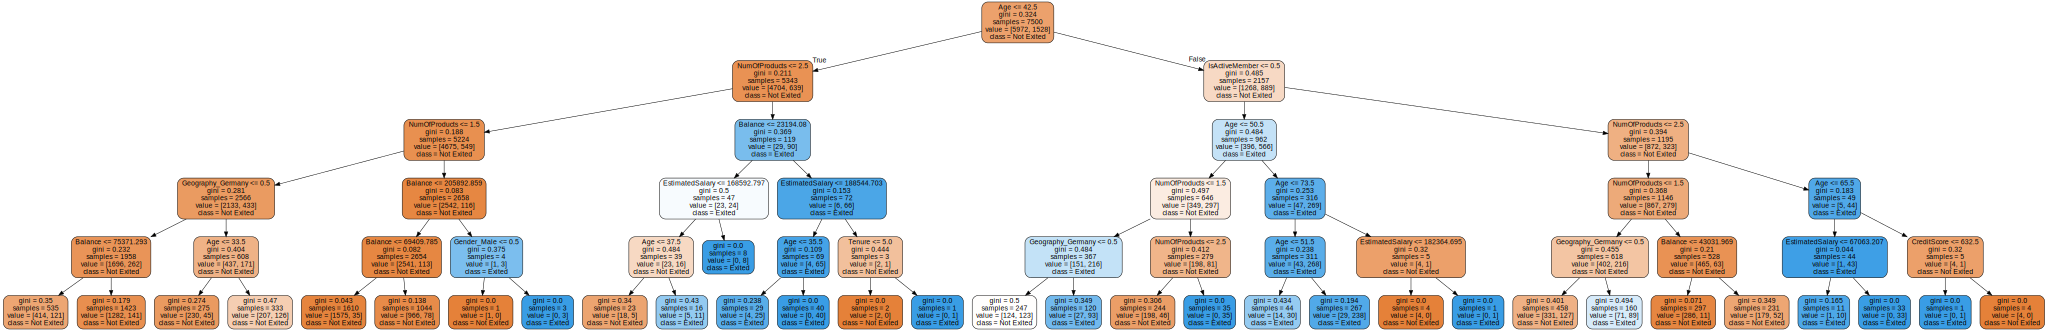

In [32]:
gv.Source(export_graphviz(tree, feature_names=x.columns, filled=True, rounded=True,
                         class_names=['Not Exited', 'Exited']))

In [33]:
y_predict = tree.predict(x_test)

In [34]:
print('# of individuals who did not Exit: {0}\n' \
     '# of individuals who did Exited: {1}' \
     .format(y_test.value_counts()[1], y_test.value_counts()[0]))
#y_test.describe()

#print('Model Predicts  \
     # # of individuals who did not Exit: {0}\n' \
    # '# of individuals who did Exited: {1}' \
     #.format(y_predict.value_counts()[1], y_predict.value_counts()[0]))

# of individuals who did not Exit: 509
# of individuals who did Exited: 1991


In [35]:
metrics.confusion_matrix(y_test, y_predict)

array([[1923,   68],
       [ 280,  229]], dtype=int64)

In [36]:
results = {'Accuracy': metrics.accuracy_score(y_test, y_predict, normalize=True),
          'Precision': metrics.precision_score(y_test, y_predict, average=None),
          'Recall': metrics.recall_score(y_test, y_predict, average=None)}
results

{'Accuracy': 0.8608,
 'Precision': array([0.87290059, 0.77104377]),
 'Recall': array([0.96584631, 0.44990177])}

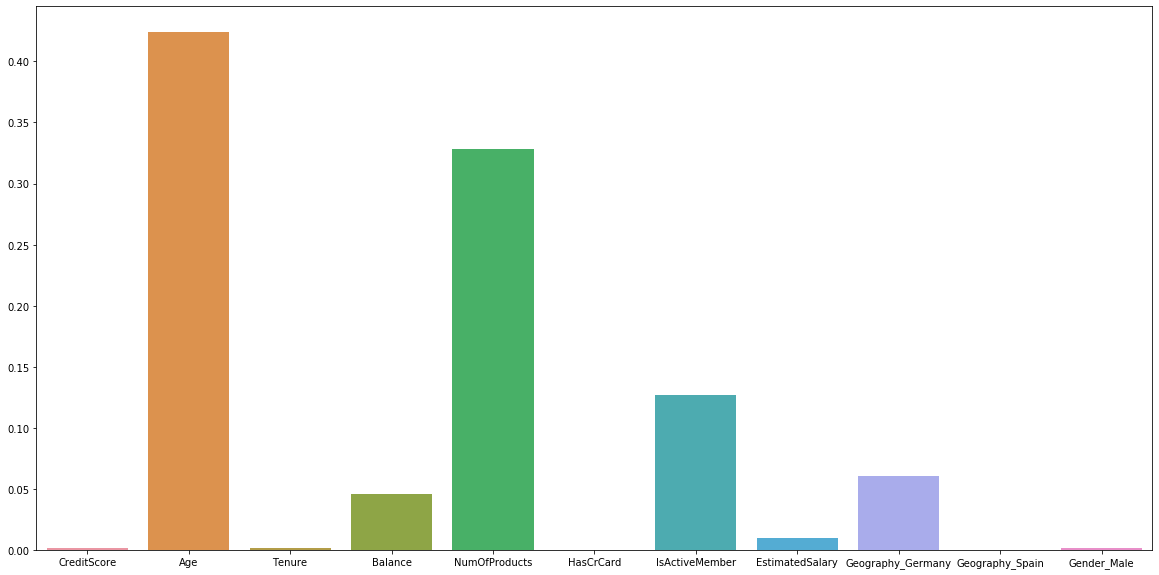

In [37]:
importance = pd.Series(data=tree.feature_importances_, index=x.columns)
plt.figure(figsize = (20,10))
sns.barplot(x.columns, importance)